# Alpha_synuclein

### Comparison of conformational ensembles of α-synuclein (residues 85–140) from the PED entries PED00024, PED00425, PED00426, PED00477 and from coarse-grained CALVADOS simulations in the IDRome dataset.

| ID / Label   | Description                                                                                                        |
|---------------|--------------------------------------------------------------------------------------------------------------------|
| **PED00024**  | Structural ensemble of α-synuclein generated using NMR experimental data.                                          |
| **AS_IDRome** | CALVADOS coarse-grained ensemble from the IDRome dataset.                                                          |
| **PED00425**  | α-synuclein ensemble generated with fractional secondary structure propensities observed in the RCSB PDB using IDPConformerGenerator. |
| **PED00426**  | α-synuclein ensemble generated with fractional secondary structure biased by chemical shift data using IDPConformerGenerator. |
| **PED00477**  | Structural ensemble of α-synuclein generated via the idpGAN machine learning model.                                |


## Global Analysis

### First step: Importing the modules from IDPET package and Loading the five ensembles from PED and `example` folder.

- Coarse-grained ensemble of α-synuclein(85-140) is downloaded from the IDRome dataset [ [Tesei, Giulio, et al. Nature (2024)](https://sid.erda.dk/cgi-sid/ls.py?share_id=AVZAJvJnCO&current_dir=IDRome/P3/78/40/85_140&flags=f)].
- Other ensembles are downloaded directly from PED
- The ensembles from PED correspond to the full-length protein, whereas the coarse-grained ensemble covers only residues 80–140.
- For comparison, the 80–140 region was considered for all PED ensembles.


In [ ]:
from idpet.ensemble import Ensemble
from idpet.ensemble_analysis import EnsembleAnalysis
from idpet.visualization import Visualization

ensembles = [

    Ensemble('PED00024e001', database='ped', residue_range=(85,140)), 
    Ensemble(code='AS_Idrome', data_path='../example/traj.xtc', top_path='../example/top.pdb'),
    Ensemble('PED00425e002', database='ped', residue_range=(85,140)),
    Ensemble('PED00426e001', database='ped', residue_range=(85,140)),
    Ensemble('PED00477e003', database='ped', residue_range=(85,140))  
    
]
# Add the path to a directory you wish in order to save the analysis

analysis = EnsembleAnalysis(ensembles)
analysis.load_trajectories() # load the trajectories which already downloaded from PED for upcoming analysis
# analysis.random_sample_trajectories(sample_size=88)
vis = Visualization(analysis=analysis) # make the visualization object for visualizing ensemble features  

### Summary table
Before delving into the analysis, we can use  `get_features_summary_dataframe()` method to obtain a useful summary of information about the ensembles. This method will provide us with a summary table.

- From here we can see that PED00477 (idpGAN) ensemble is compacted than others. 

In [34]:
analysis.get_features_summary_dataframe(selected_features=["rg", "end_to_end", "ee_on_rg", "flory_exponent"],show_variability=False)

,ensemble_code,n_residues,n_conformers,rg_mean,end_to_end_mean,ee_on_rg_mean,flory_exponent
0,PED00024e001,56,576,2.218841,5.138087,2.315663,0.538750
1,AS_Idrome,56,1000,2.280334,5.526432,2.423518,0.567693
2,PED00425e002,56,1000,1.940137,4.833098,2.491112,0.600855
3,PED00426e001,56,1000,1.981715,4.854697,2.449745,0.582762
4,PED00477e003,56,1000,2.001962,4.128289,2.062121,0.402931


### Second step: visualization of Rg :


C:\Users\hamid\idpet\EnsembleTools\idpet\visualization.py:1922: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


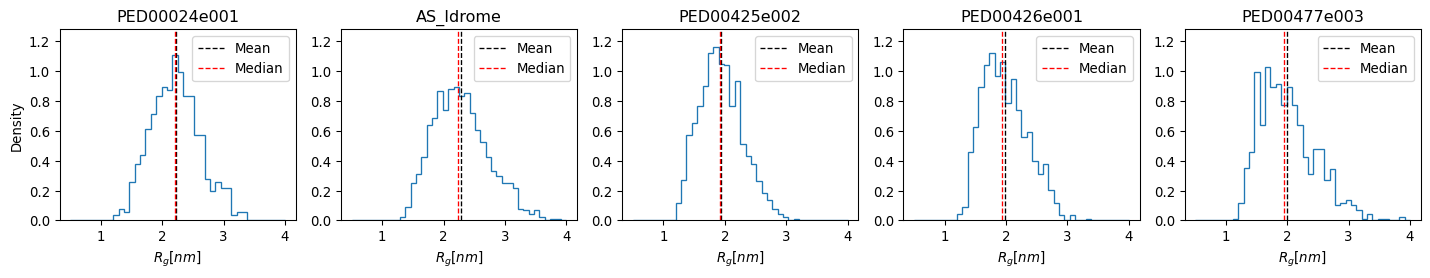

In [5]:
vis.radius_of_gyration(violin_plot=False, multiple_hist_ax=True ,hist_range=(0.5,4) ,summary_stat='both', bins=40);

- From this part we can see that CG-CALVADOS ensemble is more expanded than others

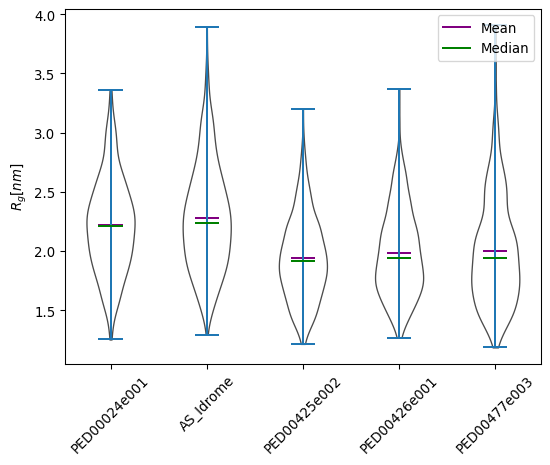

In [6]:
vis.radius_of_gyration(violin_plot=True, color='white', summary_stat='both', multiple_hist_ax=True );

### Third step: Visualization and calculation of other global features:

- End to end distances
- Asphericity 
- Prolateness
- Rg vs Asphericity  

#### End to end distances: 
- In this case idpGAN shows different Ree distribution than others.

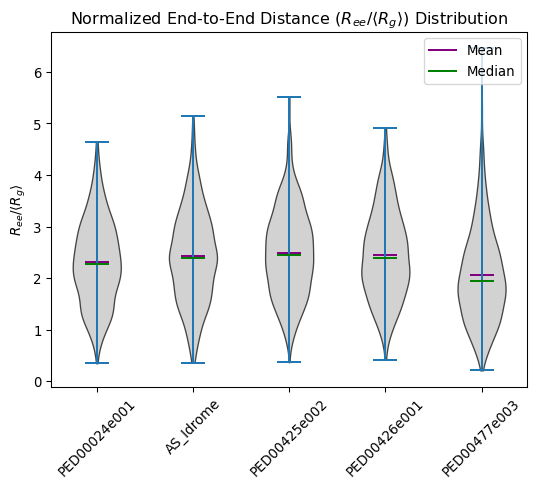

In [7]:
vis.end_to_end_distances(violin_plot=True, color='silver', summary_stat='both', rg_norm=True);

#### Asphericity: 

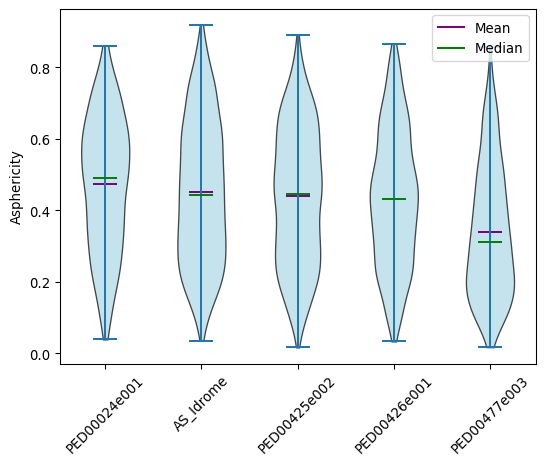

In [8]:
vis.asphericity(violin_plot=True, summary_stat='both', multiple_hist_ax=True);

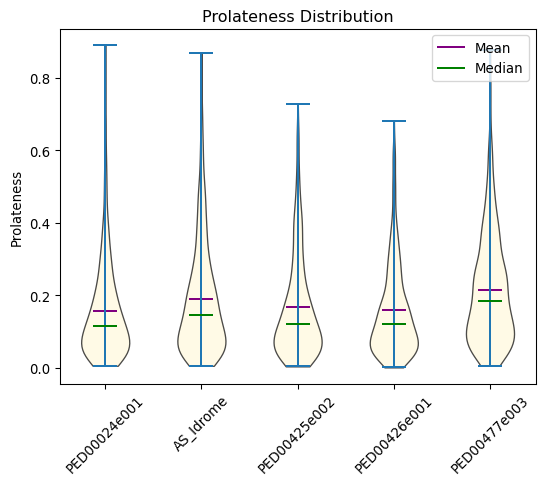

In [9]:
vis.prolateness(violin_plot=True, summary_stat='both', color='Cornsilk');

#### Correlation between Rg & Asphericity: 

Pearson coeff for PED00024e001 = 0.763
Pearson coeff for AS_Idrome = 0.774
Pearson coeff for PED00425e002 = 0.783
Pearson coeff for PED00426e001 = 0.808
Pearson coeff for PED00477e003 = 0.765


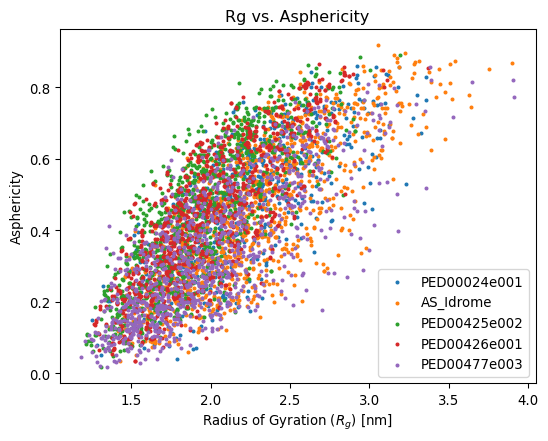

In [10]:
vis.rg_vs_asphericity();

#### Flory exponent analysis:

In [35]:
v_values = analysis.get_features("flory_exponent")
print(v_values)

{'PED00024e001': 0.5387497086478611, 'AS_Idrome': 0.567693011123289, 'PED00425e002': 0.6008552084666967, 'PED00426e001': 0.582761756397323, 'PED00477e003': 0.4029314354631549}


## Local Analysis:

Since we have a CG ensemble in this comparison we can only use Alpha angle for local part.
- Alpha anlge distributions 
  

#### Alpha angle:

The **α angle** is defined as the angle between the two hyperplanes formed by four consecutive Cα atoms and is used to describe the geometric relationship between adjacent segments of the protein backbone. 

Here, we visualize the distribution of α angles across the ensembles. Angles with values between **50–70°** (approximately **1 radian**) correspond to **helical backbone geometries**. 

The distribution of α angles clearly shows that **PED00425** is biased toward **helical conformations**. This bias likely arises from the use of **fractional secondary structure propensities** derived from the **PDB database** in generating this ensemble with **IDPConformerGenerator**.


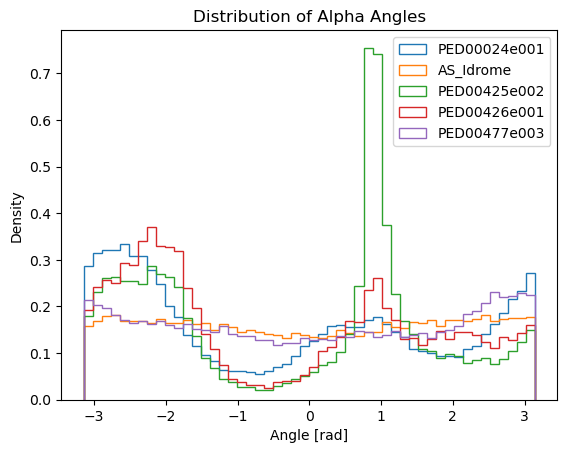

In [12]:
vis.alpha_angles();

## Dimensionality reduction Analysis:

Using IDPET `EnsembleAnalysis` module you can use dimensionality reduction methods to investigate more on the extracted local(phi-psi angles) and distance data(CA distances). Here we want to use t-SNE method to visualize the conformers in a 2D space based on selected features like Ca-distances. Using this strategy we can provide more evidence regarding how these five ensembls are different from each other. 

### First step: Extract the feature on which you want to perform dimensionality reduction algorithm

In this step using `extract_features` method in the `EnsembleAnalysis` module you can first extract the desired feature. As you can see here we first select carbon alpha distances as our selected feature by putting `ca_dist` for the `featurization` parameter.  


In [13]:
analysis.extract_features(featurization='ca_dist')

{'PED00024e001': array([[0.5947146 , 0.6778058 , 0.7306751 , ..., 0.5680508 , 0.55863035,
         0.5342121 ],
        [0.62063235, 0.9310547 , 1.0327234 , ..., 0.58827114, 0.6540276 ,
         0.58336806],
        [0.630213  , 0.9161692 , 1.2107404 , ..., 0.5815148 , 0.6674333 ,
         0.59715277],
        ...,
        [0.64373386, 0.6652556 , 0.5214339 , ..., 0.55974346, 0.577796  ,
         0.5545494 ],
        [0.57449836, 0.6858655 , 1.0448087 , ..., 0.5741087 , 0.57430696,
         0.55374986],
        [0.6536936 , 0.9332386 , 1.083529  , ..., 0.5537144 , 0.6370998 ,
         0.6117853 ]], dtype=float32),
 'AS_Idrome': array([[0.7017816 , 0.978029  , 1.2143987 , ..., 0.64220136, 0.7736139 ,
         0.6497852 ],
        [0.61975837, 0.7313678 , 0.7578233 , ..., 0.7211193 , 1.0093467 ,
         0.7393476 ],
        [0.68980336, 0.8506444 , 1.1911125 , ..., 0.6737627 , 0.66230017,
         0.54785126],
        ...,
        [0.7520232 , 1.0429989 , 1.1830515 , ..., 0.7468278 , 0.

### Second step: Perform dimensionality reduction algorithm using `reduce_features` method 

In this step using `reduce_features` method in `EnsembleAnalysis` module you will be able to reduce the dimensions of the extracted feature matrix. In this step based on the selected dimensionality reduction method you need to provide other hyperparameters. For instance for t-SNE a list of perplexity values, the number of k for k-means clustering should be defined. Furthermore to handle angular data like  φ and ψ angles you should change `circular` parameter ro `True`. A complete guide on different parameters is availbale on the documentation. 
IDPET also tries to cluster the conformations in the reduced space and it works based on k-means clustering and trying different hyperparameters such as different perplexity values and differen number for k to get the best [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)). 

In [14]:
analysis.reduce_features(method='tsne',circular=False,perplexity_vals=[10, 50, 200, 500],range_n_clusters=range(2,10,1));

### Third step: Visualization of conformations on the reduced 2D dimension based on the selected feature  

This analysis does not reveal clear differences among the five ensembles in terms of **intra-atomic Cα–Cα distances**.


C:\Users\hamid\AppData\Local\Temp\ipykernel_6572\4116335007.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white') # Set the style for the plots


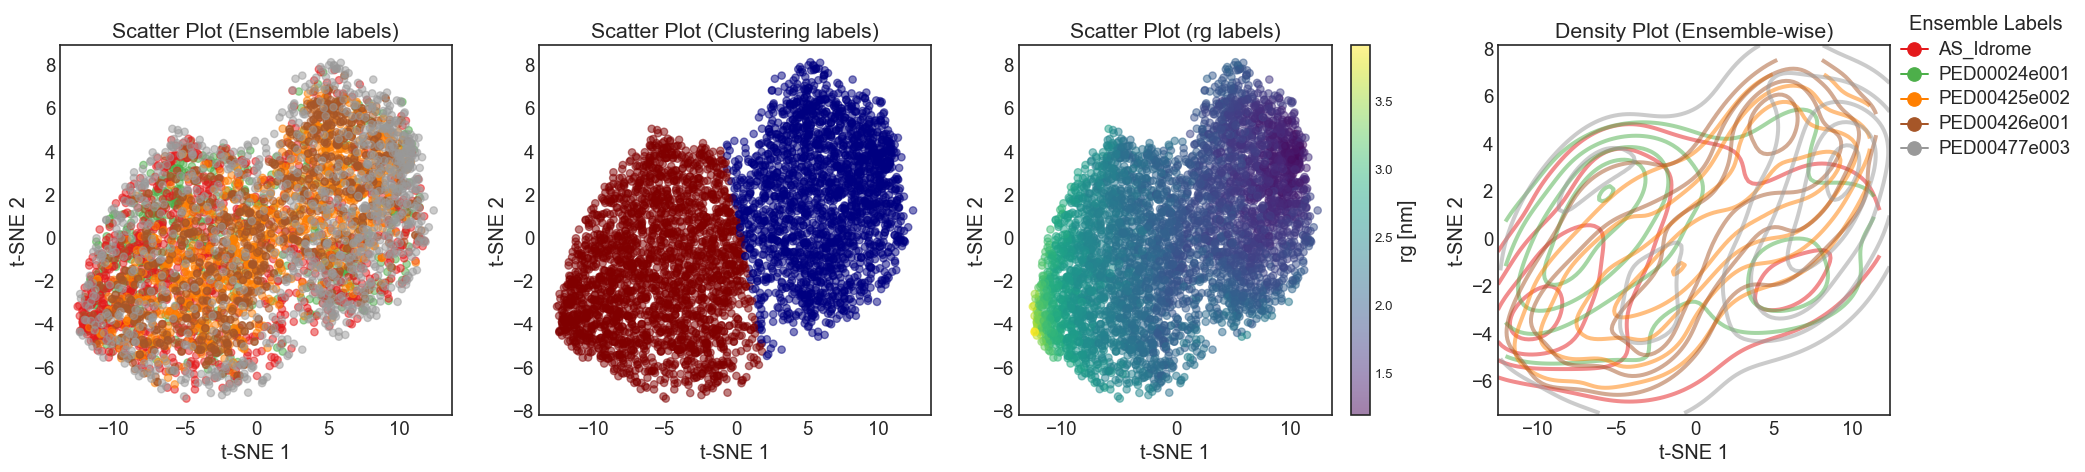

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white') # Set the style for the plots


ax = vis.dimensionality_reduction_scatter(color_by='rg', kde_by_ensemble=True, size=30,n_components=2, plotly=True, cmap_label='viridis')

for a in ax.flat:
    a.tick_params(labelsize=14)
    a.set_title(a.get_title(), fontsize=16)
    
fig = plt.gcf()  # get current figure
legend = fig.legends[0]  # assumes one figure-level legend
for text in legend.get_texts():
    text.set_fontsize(14)
legend.set_title(legend.get_title().get_text(), prop={'size': 15}) 



### Site-specific Order Parameter

The plot shows the **site-specific order parameter** for the five α-synuclein ensembles.  
Overall, the order parameter values are relatively consistent across most residues, indicating similar backbone flexibility profiles.  
However, **PED00024** exhibits a noticeable increase in order near residues **30–45**, suggesting higher structural ordering in this region.  
This elevated rigidity is likely due to the experimental constraints used in generating **PED00024**, whereas the other ensembles, particularly **PED00477**, display greater conformational flexibility throughout the sequence.


<Axes: title={'center': 'Site-specific Order Parameter'}, xlabel='Residue Index', ylabel='Order parameter'>

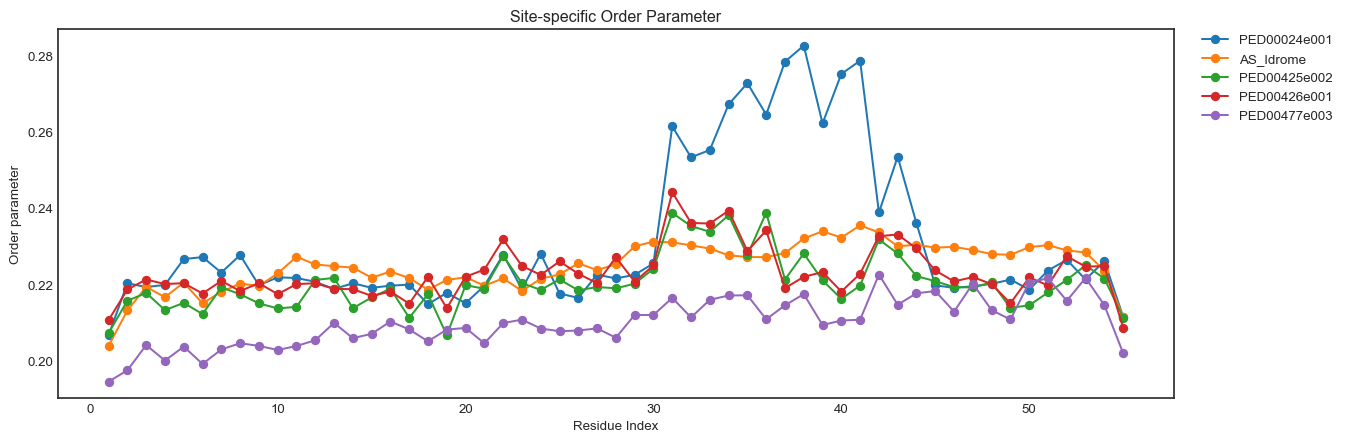

In [16]:
vis.site_specific_order()

### Cα–Cα Distance Maps

The panels show the **Cα–Cα distance maps** for the five α-synuclein ensembles, representing the average pairwise distances between residues 80–140.  
Overall, the maps display similar distance patterns, indicating comparable global chain dimensions across ensembles.  
No major deviations are observed, suggesting that the overall compactness and residue–residue distance distributions remain consistent among the models.  
This supports the observation that there are **no clear structural differences** among the ensembles based on intra-atomic Cα–Cα distances.


[<Axes: title={'center': 'PED00024e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'AS_Idrome CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00425e002 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00426e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00477e003 CA'}, xlabel='j', ylabel='i'>]

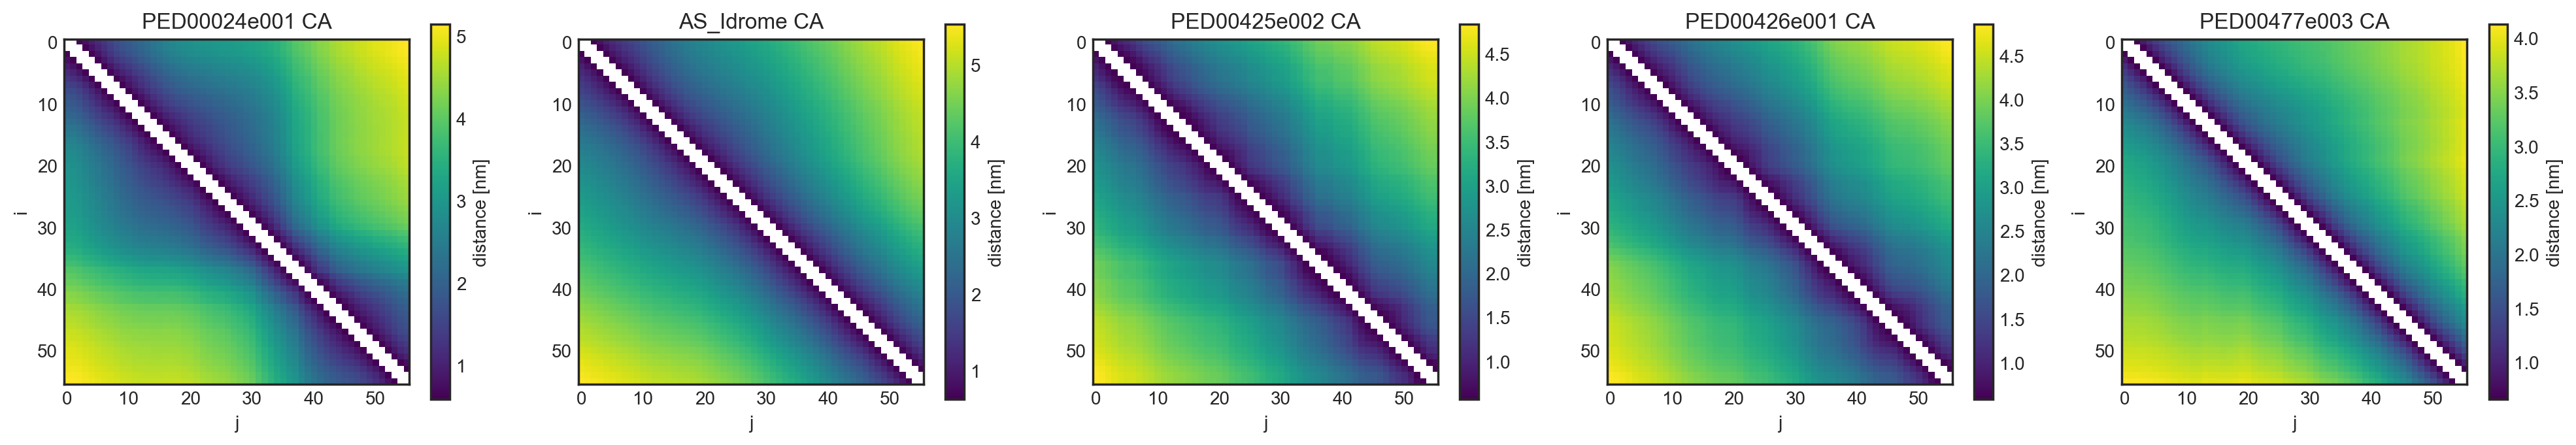

In [17]:
vis.distance_maps(min_sep=2,max_sep=None, distance_type='ca', dpi=200,inverse=False ,save=True, get_names=True, color='viridis')


The panels show the **Cα contact frequency maps** for the five α-synuclein ensembles (residues 80–140).  
Each map represents the probability of residue pairs being in contact, with darker regions indicating higher contact frequencies.  
Overall, the contact patterns are broadly similar across the ensembles, reflecting comparable overall conformational behavior.  
However, **PED00024** exhibits slightly enhanced long-range contacts.

array([<Axes: title={'center': 'PED00024e001'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'AS_Idrome'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'PED00425e002'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'PED00426e001'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'PED00477e003'}, xlabel='j', ylabel='i'>],
      dtype=object)

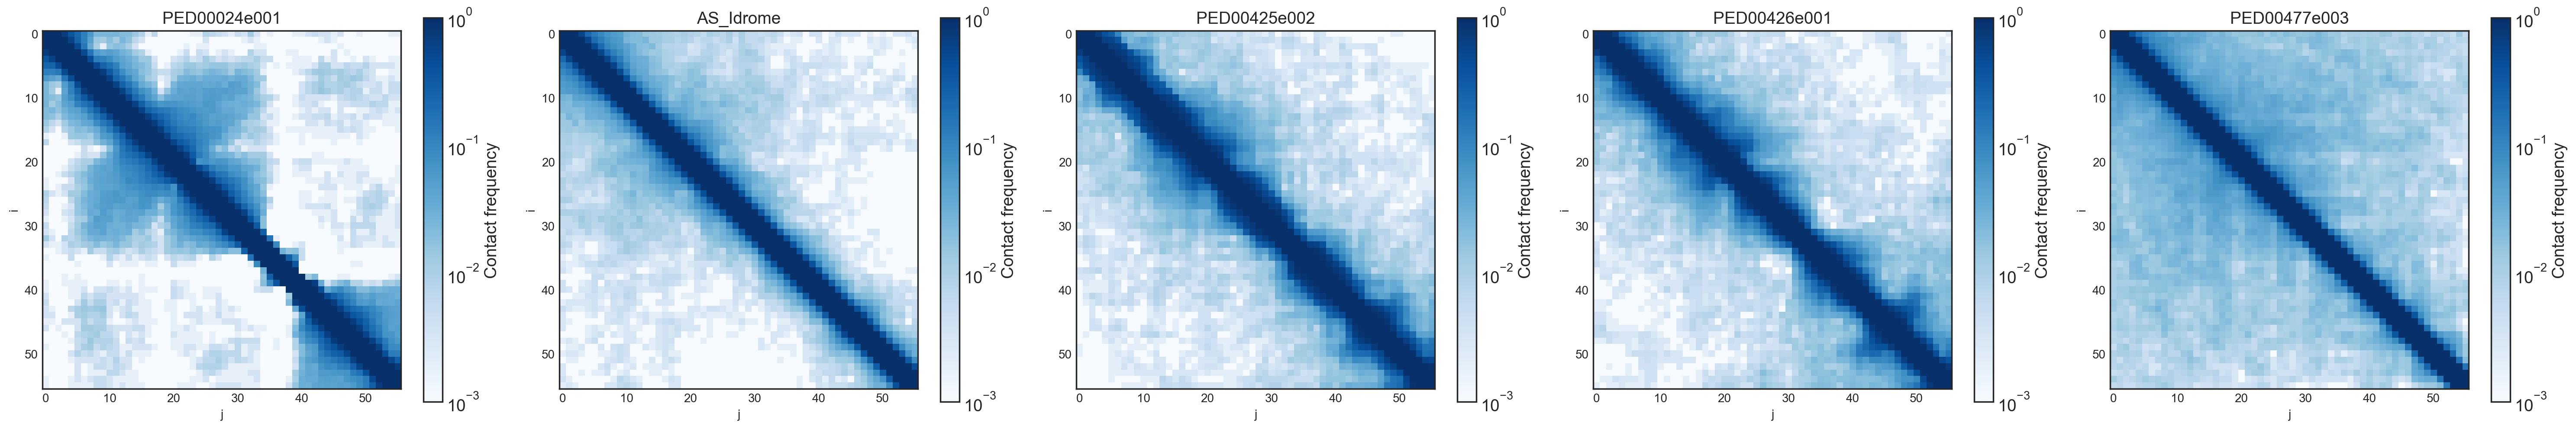

In [36]:
vis.contact_prob_maps(avoid_zero_count=True, dpi=200, save=True, log_scale=True, color='Blues', threshold=0.9)

### Ensemble Comparison metrics
- adaJSD and ataJSD can be used for comparisons involved CG ensembles
- The similarity between idpGAN and CALVADOS(IDRome) ensemble can be detected here. 

# Scoring 'jsd' using features 'ca_dist'
num_bins: 24
- Number of bins for all comparisons: 24
- We have 10 pairs of ensembles and will perform a total of 10 comparisons.
# Scoring 'jsd' using features 'alpha_angle'
num_bins: 24
- Number of bins for all comparisons: 24
- We have 10 pairs of ensembles and will perform a total of 10 comparisons.


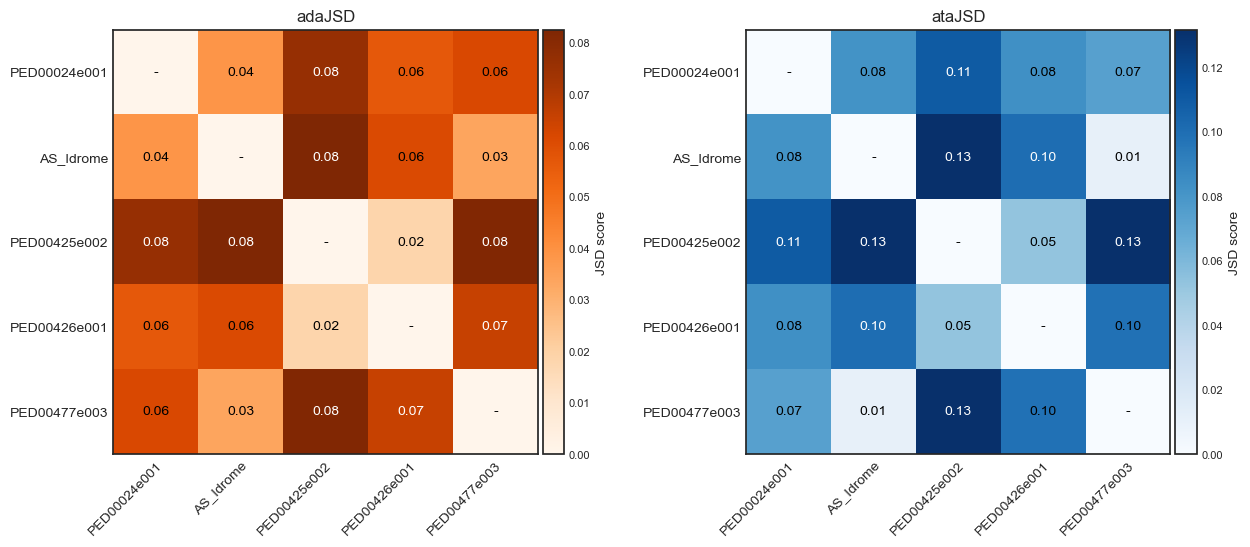

In [20]:
bins = "auto"

# Create a figure with two panels.
fig, ax = plt.subplots(1, 2, figsize=(13, 8))

# Plot on the left panel all-vs-all adaJSD scores (compare Ca-Ca distances).
vis.comparison_matrix(
    score="adaJSD",
    bins=bins,
    ax=ax[0],
    cmap="Oranges",
    verbose=True
)

# Plot on the right panel all-vs-all ramaJSD scores (compare phi/psi angles).


vis.comparison_matrix(
    score="ataJSD",
    bins=bins,
    ax=ax[1],
    cmap="Blues",
    verbose=True
)

plt.tight_layout(pad=2.5)
plt.show()